In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.datasets import fetch_20newsgroups
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, MaxPooling1D, LSTM, Dense, Dropout
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.datasets import fetch_20newsgroups
from sklearn.model_selection import train_test_split

In [ ]:
newsgroups = fetch_20newsgroups(subset='all')
df = pd.DataFrame({'text': newsgroups.data, 'category': newsgroups.target})
df['category'] = df['category'].map(lambda x: newsgroups.target_names[x])
df['text_length'] = df['text'].apply(len)

In [ ]:
print(df['category'].value_counts())

category
rec.sport.hockey            999
soc.religion.christian      997
rec.motorcycles             996
rec.sport.baseball          994
sci.crypt                   991
rec.autos                   990
sci.med                     990
comp.windows.x              988
sci.space                   987
comp.os.ms-windows.misc     985
sci.electronics             984
comp.sys.ibm.pc.hardware    982
misc.forsale                975
comp.graphics               973
comp.sys.mac.hardware       963
talk.politics.mideast       940
talk.politics.guns          910
alt.atheism                 799
talk.politics.misc          775
talk.religion.misc          628
Name: count, dtype: int64


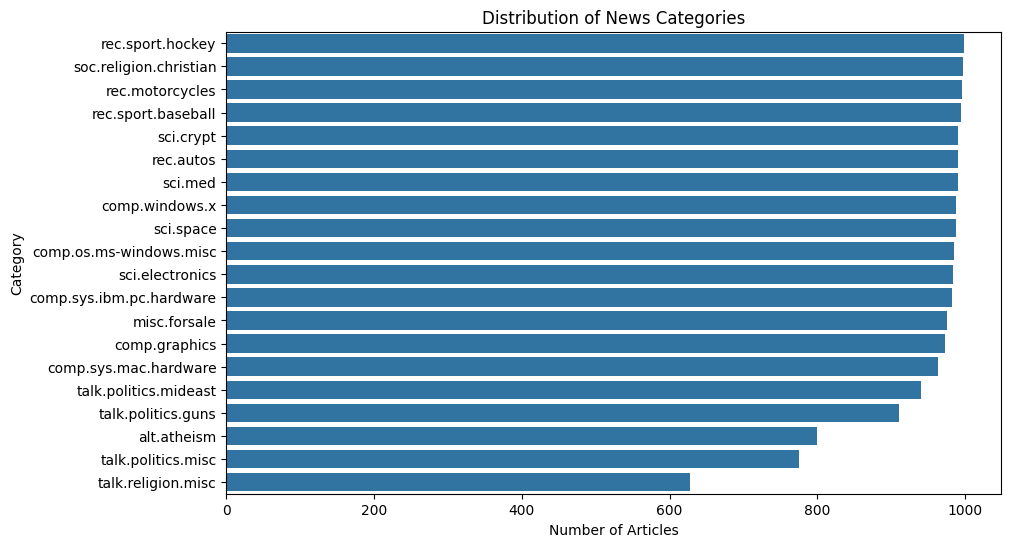

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, y='category', order=df['category'].value_counts().index)
plt.title('Distribution of News Categories')
plt.xlabel('Number of Articles')
plt.ylabel('Category')
plt.show()

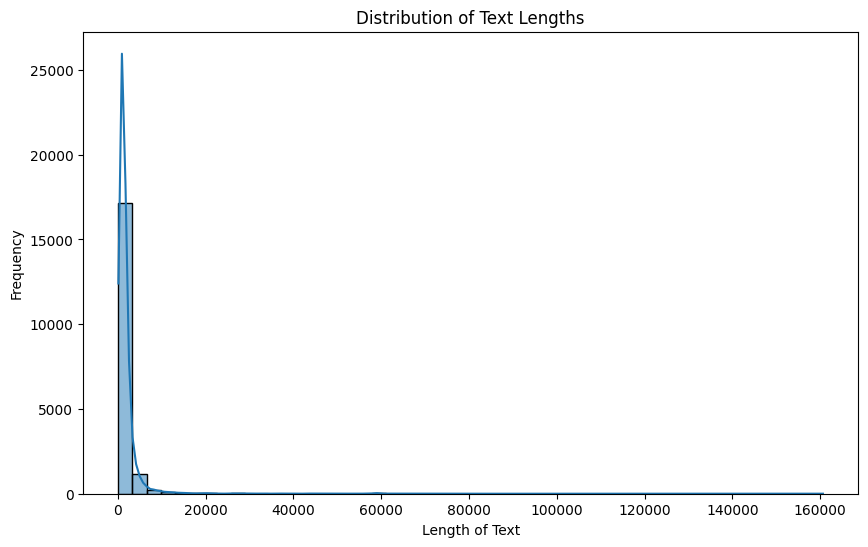

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df['text_length'], bins=50, kde=True)
plt.title('Distribution of Text Lengths')
plt.xlabel('Length of Text')
plt.ylabel('Frequency')
plt.show()

In [ ]:
max_words = 10000
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(df['text'])
word_index = tokenizer.word_index
print(f"Number of unique tokens: {len(word_index)}")

Number of unique tokens: 179209


In [ ]:
sequences = tokenizer.texts_to_sequences(df['text'])
max_len = 200
padded_sequences = pad_sequences(sequences, maxlen=max_len)
print(f"Padded sequences shape: {padded_sequences.shape}")

Padded sequences shape: (18846, 200)


In [ ]:
newsgroups = fetch_20newsgroups(subset='all')
X = newsgroups.data
y = newsgroups.target

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
max_words = 10000
max_len = 200

In [ ]:
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(X_train)
X_train_sequences = tokenizer.texts_to_sequences(X_train)
X_test_sequences = tokenizer.texts_to_sequences(X_test)

In [ ]:
X_train_padded = pad_sequences(X_train_sequences, maxlen=max_len)
X_test_padded = pad_sequences(X_test_sequences, maxlen=max_len)

In [ ]:
model = Sequential()
model.add(Embedding(input_dim=max_words, output_dim=128, input_length=max_len))
model.add(Conv1D(filters=64, kernel_size=5, activation='relu'))
model.add(MaxPooling1D(pool_size=4))
model.add(LSTM(64, return_sequences=False))  # Changed to False
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(len(newsgroups.target_names), activation='softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
history = model.fit(X_train_padded, y_train, epochs=50, batch_size=32, validation_split=0.1)

Epoch 1/50
424/424 ━━━━━━━━━━━━━━━━━━━━ 12s 9ms/step - accuracy: 0.0741 - loss: 2.9100 - val_accuracy: 0.3561 - val_loss: 1.8359
Epoch 2/50
424/424 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.3658 - loss: 1.8183 - val_accuracy: 0.5020 - val_loss: 1.4061
Epoch 3/50
424/424 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.5571 - loss: 1.2629 - val_accuracy: 0.6160 - val_loss: 1.1216
Epoch 4/50
424/424 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - accuracy: 0.6601 - loss: 0.9510 - val_accuracy: 0.6545 - val_loss: 1.0657
Epoch 5/50
424/424 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.7210 - loss: 0.7600 - val_accuracy: 0.6969 - val_loss: 0.9845
Epoch 6/50
424/424 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.7678 - loss: 0.6412 - val_accuracy: 0.7361 - val_loss: 0.9397
Epoch 7/50
424/424 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.8172 - loss: 0.5342 - val_accuracy: 0.7520 - val_loss: 0.9592
Epoch 8/50
424/424 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.8596 - loss: 0.4567 - val_accuracy:

In [ ]:
loss, accuracy = model.evaluate(X_test_padded, y_test)
print(f"Test Accuracy: {accuracy:.4f}")

118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7915 - loss: 2.2640
Test Accuracy: 0.8029


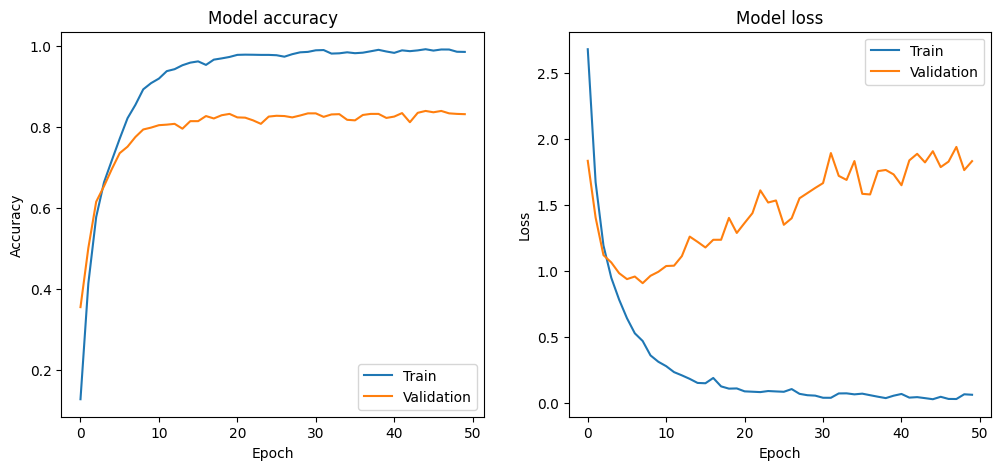

In [ ]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'])

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'])

plt.show()